**READ ME:**

TITLE: What Pup? (WGU Computer Science Capstone, C964 P.A.)

PURPOSE: Dog breed image classification web application. Identifies up to 70 dog breeds with a test accuracy of 45%.

DIRECTIONS: Click the link below to access the application on HuggingFace. For all other information regarding this project, including data and model reports, scroll down and click on the desired section.
> [What Pup?](https://huggingface.co/spaces/LStrough/What-Pup)

ENVIRONMENT: 


> Programming language: Python 3

> IDE: Google Colab

> API: Gradio.app 

> The application is permanently hosted in a HuggingFace.co “public space”


APPLICATION VERSION & DATE: Application Version 1.0, 05/14/2023

AUTHOR: Lydia Strough, WGU#002452624

# Mount Google Drive, Import Libraries

Mount Google Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
# Import Libraries
!pip install tensorflow
!pip install gradio

import tensorflow as tf
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import glob
import cv2

from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Data

## Explore the data

Download dataset

In [ ]:
# Dog breed image dataset downloaded to Google Drive
# Link to original dataset: https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set

Explore the training, validation, and testing dataset

In [ ]:
# Set path to the CSV file with the dataset metadata
csv_path = '/content/drive/MyDrive/Colab_Notebooks/data/dogs/dogs.csv'

# Load the CSV file with the metadata
metadata = pd.read_csv(csv_path)
print(metadata)

                 filepaths  labels data set
0     train/Afghan/001.jpg  Afghan    train
1     train/Afghan/002.jpg  Afghan    train
2     train/Afghan/003.jpg  Afghan    train
3     train/Afghan/004.jpg  Afghan    train
4     train/Afghan/005.jpg  Afghan    train
...                    ...     ...      ...
9341   valid/Yorkie/06.jpg  Yorkie    valid
9342   valid/Yorkie/07.jpg  Yorkie    valid
9343   valid/Yorkie/08.jpg  Yorkie    valid
9344   valid/Yorkie/09.jpg  Yorkie    valid
9345   valid/Yorkie/10.jpg  Yorkie    valid

[9346 rows x 3 columns]


In [ ]:
# Calculate the number of classes (dog breeds) within the dataset
num_classes = len(metadata['labels'].unique())
print('The number of classes is',num_classes)

The number of classes is 71


In [ ]:
# Check list of unique breeds for discrepencies
print(metadata['labels'].unique())

['Afghan' 'African Wild Dog' 'Airedale' 'American Hairless'
 'American Spaniel' 'Basenji' 'Basset' 'Beagle' 'Bearded Collie'
 'Bermaise' 'Bichon Frise' 'Blenheim' 'Bloodhound' 'Bluetick'
 'Border Collie' 'Borzoi' 'Boston Terrier' 'Boxer' 'Bull Mastiff'
 'Bull Terrier' 'Bulldog' 'Cairn' 'Chihuahua' 'Chinese Crested' 'Chow'
 'Clumber' 'Cockapoo' 'Cocker' 'Collie' 'Corgi' 'Coyote' 'Dalmation'
 'Dhole' 'Dingo' 'Doberman' 'Elk Hound' 'French Bulldog' 'German Sheperd'
 'Golden Retriever' 'Great Dane' 'Great Perenees' 'Greyhound'
 'Groenendael' 'Irish Spaniel' 'Irish Wolfhound' 'Japanese Spaniel'
 'Komondor' 'Labradoodle' 'Labrador' 'Lhasa' 'Malinois' 'Maltese'
 'Mex Hairless' 'Newfoundland' 'Pekinese' 'Pit Bull' 'Pomeranian' 'Poodle'
 'Pug' 'Rhodesian' 'Rottweiler' 'Saint Bernard' 'Schnauzer'
 'Scotch Terrier' 'Shar_Pei' 'Shiba Inu' 'Shih-Tzu' 'Siberian Husky'
 'Vizsla' 'Yorkie' 'American  Spaniel']


In [ ]:
# CSV counted the "American Spaniel" twice.
# The total number of classes = 70

In [ ]:
# Count the number of images in each directory (training, validation, and testing)
for directory in ['train', 'valid', 'test']:
    directory_count = len(metadata[metadata['data set'] == directory])
    print('Number of images in',directory,':',directory_count)

Number of images in train : 7946
Number of images in valid : 700
Number of images in test : 700


Sample the dataset

Image shape: (224, 224, 3)


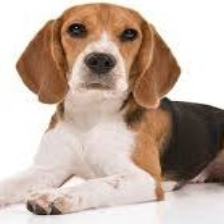

In [ ]:
# Beagle sample image from raw training dataset

# Read the image
beagle = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/data/dogs/raw/train/Beagle/001.jpg')
# Print the image shape
print('Image shape:',beagle.shape)
# Show the image in question
cv2_imshow(beagle)

Image shape: (224, 224, 3)


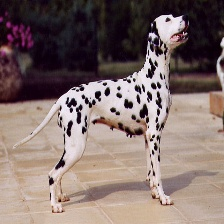

In [ ]:
# Dalmation sample image from raw training dataset

# Read the image
dalmation = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/data/dogs/raw/train/Dalmation/01.jpg')
# Print the image shape
print('Image shape:',dalmation.shape)
# Show the image in question
cv2_imshow(dalmation)

Image shape: (224, 224, 3)


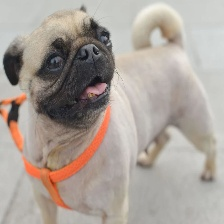

In [ ]:
# Pug sample image from raw training dataset

# Read the image
pug = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/data/dogs/raw/train/Pug/001.jpg')
# Print the image shape
print('Image shape:',pug.shape)
# Show the image in question
cv2_imshow(pug)

Visualize the distribution of images across the training dataset

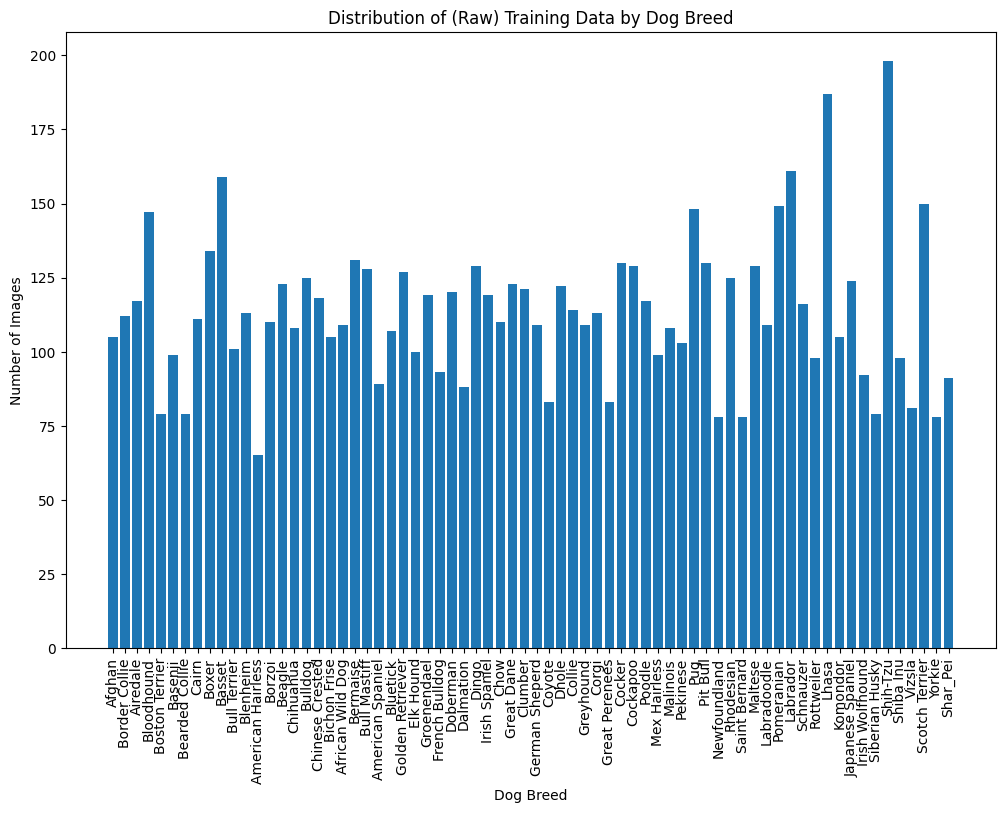

In [ ]:
# Determine the number of images within each folder (dog breed) in the original training dataset directory

# Set path for original training dataset directory
train_folders = glob.glob('/content/drive/MyDrive/Colab_Notebooks/data/dogs/raw/train/*')
# Creat list (class_count) with the same number of items as there are folders in the training dataset directory
class_count = [0] * len(train_folders)
# Create an empty list (labels) that will hold the class names
labels = []

# Loop through each folder within the training dataset directory
for i, folder in enumerate(train_folders):
    # Extract the class name from the currecnt folder
    class_name = os.path.basename(folder)
    # Append the class name to the labels list
    labels.append(class_name)
    # Count the number of files within the current folder
    file_count = len(os.listdir(folder))
    # Assign the file count to the corresponding index in the class count list
    class_count[i] = file_count

# Plot bar chart

# Set size of figure
plt.figure(figsize=(12, 8))
plt.bar(labels, class_count)

# Turn labels 90 degrees, so they don't overlap 
plt.xticks(rotation = 90)

plt.xlabel('Dog Breed')
plt.ylabel('Number of Images')
plt.title('Distribution of (Raw) Training Data by Dog Breed')
plt.show()

# Save figure as "raw-training-data-bias.png"
# plt.savefig('/content/drive/MyDrive/Colab_Notebooks/reports/dogs/bias/raw-training-data-bias.png')


Find the training folder with the least number of images

In [ ]:
# Find the dog breed folder with the least number of images

# Set path for original training dataset directory
train_folder = '/content/drive/MyDrive/Colab_Notebooks/data/dogs/raw/train'
# Initialize minimum number of images to postivie infinity (anything less will be the new minimum)
min_images = float('inf')

# Iterate through each item in training folder directory
for folder in os.listdir(train_folder):
    # Creates a path for current item
    folder_path = os.path.join(train_folder, folder)
    # Checks that current item is a folder
    if os.path.isdir(folder_path):
        # Count the number of images within the current folder
        num_images = len(os.listdir(folder_path))
        # Check if current folder's "num_images" is less that "min_images"
        if num_images < min_images:
            # Update "min_image" with current folder's "num_images"
            min_images = num_images

print('Maximum number of images per folder:',min_images)

Maximum number of images per folder: 65


## Preprocess the data

Remove bias from training data

In [ ]:

# Set path for new training dataset folder (where processed data will be stored)
new_train_folder = '/content/drive/MyDrive/Colab_Notebooks/data/dogs/interim/train'

# Process the folders to have equal number of images
# Iterate through training folder directory
for folder in os.listdir(train_folder):
    # Create new path for training folders 
    folder_path = os.path.join(train_folder, folder)
    new_folder_path = os.path.join(new_train_folder, folder)
    # If the new folder already exists, do nothing
    os.makedirs(new_folder_path, exist_ok = True)
    # Checks that current item is a folder
    if os.path.isdir(folder_path):
        # Create a list of images from the specified folder path equal to min_images
        images = os.listdir(folder_path)[:min_images]
        # Iterate through image list
        for image in images:
            # Create a path to the source image file
            src_path = os.path.join(folder_path, image)
            # Create a path to the destination image file
            dst_path = os.path.join(new_folder_path, image)
            # Copy image from the original location to new location 
            shutil.copy(src_path, dst_path)

print('Done!')

Done!


Visualize the distribution of images across the training dataset

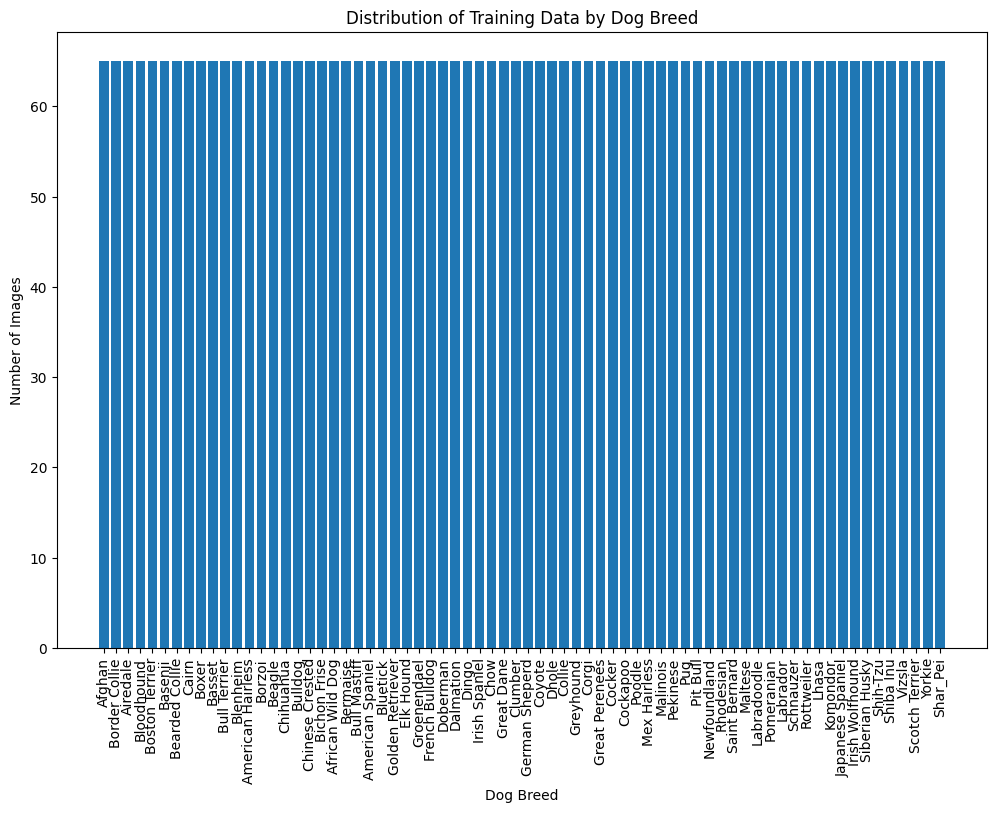

In [ ]:
# Determine the number of images within each folder (dog breed) in the intermediate training dataset directory

# Set path for intermediate training dataset directory
train_folders = glob.glob('/content/drive/MyDrive/Colab_Notebooks/data/dogs/interim/train/*')
# Creat list (class_count) with the same number of items as there are folders in the training dataset directory
class_count = [0] * len(train_folders)
# Create an empty list (labels) that will hold the class names
labels = []

# Loop through each folder within the intermediate training dataset directory
for i, folder in enumerate(train_folders):
    # Extract the class name from the currecnt folder
    class_name = os.path.basename(folder)
    # Append the class name to the labels list
    labels.append(class_name)
    # Count the number of files within the current folder
    file_count = len(os.listdir(folder))
    # Assign the file count to the corresponding index in the class count list
    class_count[i] = file_count

# Plot bar chart

# Set size of figure
plt.figure(figsize = (12, 8))
plt.bar(labels, class_count)

# Turn labels 90 degrees, so they don't overlap 
plt.xticks(rotation = 90)

plt.xlabel('Dog Breed')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Data by Dog Breed')
plt.show()

# Save figure as "interim-training-data-bias.png"
# plt.savefig('/content/drive/MyDrive/Colab_Notebooks/reports/dogs/bias/interim-training-data-bias.png')

## Prepare data for model usage

In [ ]:
'''
# Set hyperparameters
batch_size = 32
image_size = (224, 224)
validation_split = 0.2

# Define the path to the intermediate training data directory
train_path = '/content/drive/MyDrive/Colab_Notebooks/data/dogs/interim/train'

# Define data augmentation settings for training set
train_datagen = ImageDataGenerator(rescale = 1.0/255, validation_split = validation_split)

# Create flow from directory for training set
train_set = train_datagen.flow_from_directory( # 3640 images
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

# Create flow from directory for validation set
valid_set = train_datagen.flow_from_directory( # 910 images
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = False
)
'''
# Unaugmented

"\n# Set hyperparameters\nbatch_size = 32\nimage_size = (224, 224)\nvalidation_split = 0.2\n\n# Define the path to the intermediate training data directory\ntrain_path = '/content/drive/MyDrive/Colab_Notebooks/data/dogs/interim/train'\n\n# Define data augmentation settings for training set\ntrain_datagen = ImageDataGenerator(rescale = 1.0/255, validation_split = validation_split)\n\n# Create flow from directory for training set\ntrain_set = train_datagen.flow_from_directory( # 3640 images\n    train_path,\n    target_size = image_size,\n    batch_size = batch_size,\n    class_mode = 'categorical',\n    subset = 'training',\n    shuffle = True\n)\n\n# Create flow from directory for validation set\nvalid_set = train_datagen.flow_from_directory( # 910 images\n    train_path,\n    target_size = image_size,\n    batch_size = batch_size,\n    class_mode = 'categorical',\n    subset = 'validation',\n    shuffle = False\n)\n"

In [ ]:

# Set hyperparameters
batch_size = 32                                       
image_size = (224, 224)
validation_split = 0.2

# Define the path to the intermediate training data directory
train_path = '/content/drive/MyDrive/Colab_Notebooks/data/dogs/interim/train'

# Define data augmentation settings for training set
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 20,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    validation_split = validation_split
)

# Define data preprocessing settings for validation set
valid_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = validation_split
)

# Create flow from directory for training set
train_set = train_datagen.flow_from_directory( # 3640 images
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

# Create flow from directory for validation set
valid_set = valid_datagen.flow_from_directory( # 910 images
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = False
)

# Augmented

Found 3640 images belonging to 70 classes.
Found 910 images belonging to 70 classes.


# Model

## Define the model

In [ ]:
# Define the model
model = Sequential([
    # Convolutional layer
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
     # Convolutional layer
    Conv2D(32, (3, 3), activation = 'relu'),
    # Pooling layer
    MaxPooling2D(2, 2),

    # Convolutional layer
    Conv2D(64, (3, 3), activation = 'relu'),
    # Convolutional layer
    Conv2D(128, (3, 3), activation = 'relu'),
    # Pooling layer
    MaxPooling2D(2, 2),

    # Flatten the output
    Flatten(),

    # Fully connected layer with 128 nodes
    Dense(128, activation = 'relu'),
    # Dropout
    Dropout(0.2),                           
    # Output layer with 70 nodes (one for each dog breed)
    Dense(70, activation = 'softmax')
])

### vX_1 (vX + DO)
  # Aug: 10 epochs -> loss: 3.5779 - accuracy: 0.1077 - val_loss: 3.5071 - val_accuracy: 0.1418
  # Aug: 50e -> loss: 2.1072 - accuracy: 0.4146 - val_loss: 2.7292 - val_accuracy: 0.3385
  # Aug: 100e -> loss: 1.2812 - accuracy: 0.6316 - val_loss: 2.9871 - val_accuracy: 0.4110

In [ ]:
# View the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

## Compile the model

In [ ]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Train and validate the model

Define callback methods

In [ ]:
# Define model checkpoint callback
checkpoint_path = '/content/drive/MyDrive/Colab_Notebooks/models/dogs/best_model.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_path, 
    save_best_only = True, 
    save_weights_only = False, 
    monitor = 'val_accuracy', 
    mode = 'max', 
    verbose = 1)

Train and validate the model

In [ ]:
# Train and validate the model
history = model.fit(
    train_set,
    epochs = 100,
    validation_data = valid_set,
    callbacks = [model_checkpoint])

Plot the model's training history

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Test the model

Test the model

In [ ]:
# Load the trained model
model = load_model('/content/drive/MyDrive/Colab_Notebooks/models/dogs/best_model.h5')

# Define the path to the raw testing data directory
test_path = '/content/drive/MyDrive/Colab_Notebooks/data/dogs/raw/test'

# Define data preprocessing settings for testing set
test_datagen = ImageDataGenerator(rescale = 1.0/255)

# Create flow from directory for testing set
test_set = test_datagen.flow_from_directory( # 700 images
        test_path,
        target_size = (224, 224),
        batch_size = 1,
        class_mode = 'categorical',
        shuffle = False)

# Evaluate the trained model with the test data
test_loss, test_acc = model.evaluate(test_set)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Plot confusion matrix

In [ ]:
# Plot confusion matrix
# Use the trained model to make predictions on the testing data
y_pred = model.predict(test_set)
y_pred_labels = np.argmax(y_pred, axis = 1)
true_labels = test_set.classes

# Compute the confusion matrix using the true labels and predicted labels
conf_matrix = confusion_matrix(true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize = (10, 10))
plt.imshow(conf_matrix, cmap = plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# API (Built, then hosted on Hugging Face)

Load and compile the trained model

In [ ]:
# Load the trained model
model = load_model('/content/drive/MyDrive/Colab_Notebooks/models/best_model.h5')

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Load the CSV file with the dataset metadata

In [ ]:
# Define the path to the CSV file with the metadata
csv_path = '/content/drive/MyDrive/Colab_Notebooks/data/dogs/dogs.csv'

# Load the CSV file with the metadata
metadata = pd.read_csv(csv_path)

Build and launch gradio app

In [ ]:
# Define class names (dog breeds)
class_names = metadata['labels'].unique()
print('Class names:',class_names)

# Define the prediction method
def predict_breed(image):
    image = image.reshape((-1, 224, 224, 3))
    prediction = model.predict(image)[0]
    return {class_names[i]: float(prediction[i]) for i in range(70)}

# Initialize example images
eg_image = ['/content/drive/MyDrive/Colab_Notebooks/Great-Pyrenees.jpg']

# Build the interface
interface = gr.Interface(
    fn = predict_breed,
    inputs = gr.inputs.Image(shape = (224, 224)),
    outputs = gr.outputs.Label(num_top_classes = 5),
    examples = eg_image,
    title = "What Pup?",
    description = "Dog breed identification with Machine Learning",
    theme = "default",
    capture_session = True,
    enable_queue = True
    )

# Launch the app!
interface.launch(debug = True)

# Reports

Bar chart (Data bias)

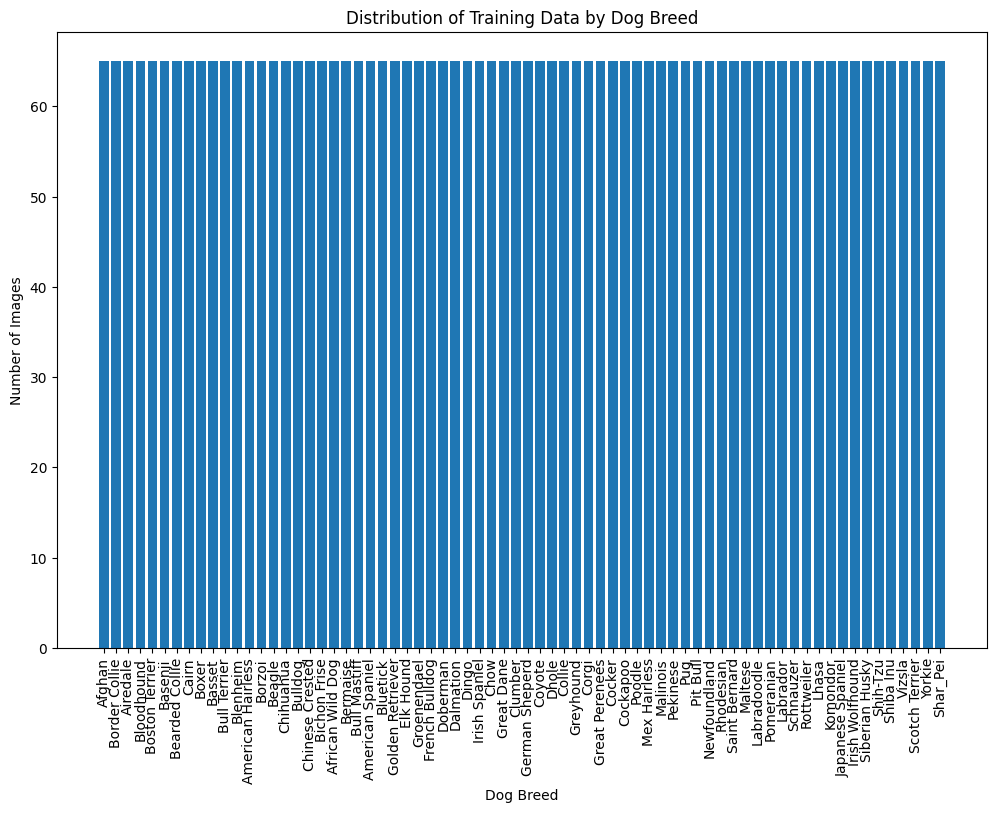

Plot (Model training history)

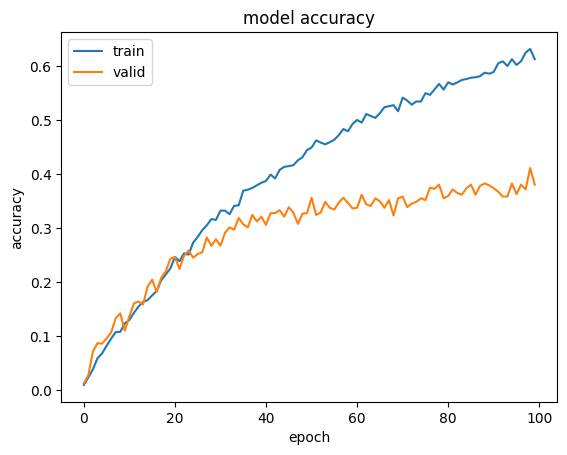

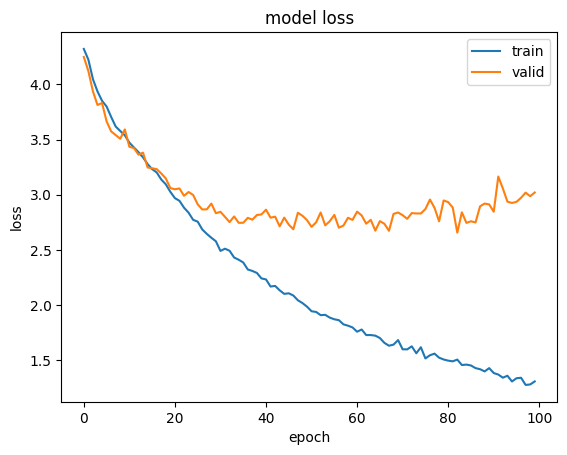

Confusion Matrix (Model performance & accuracy)

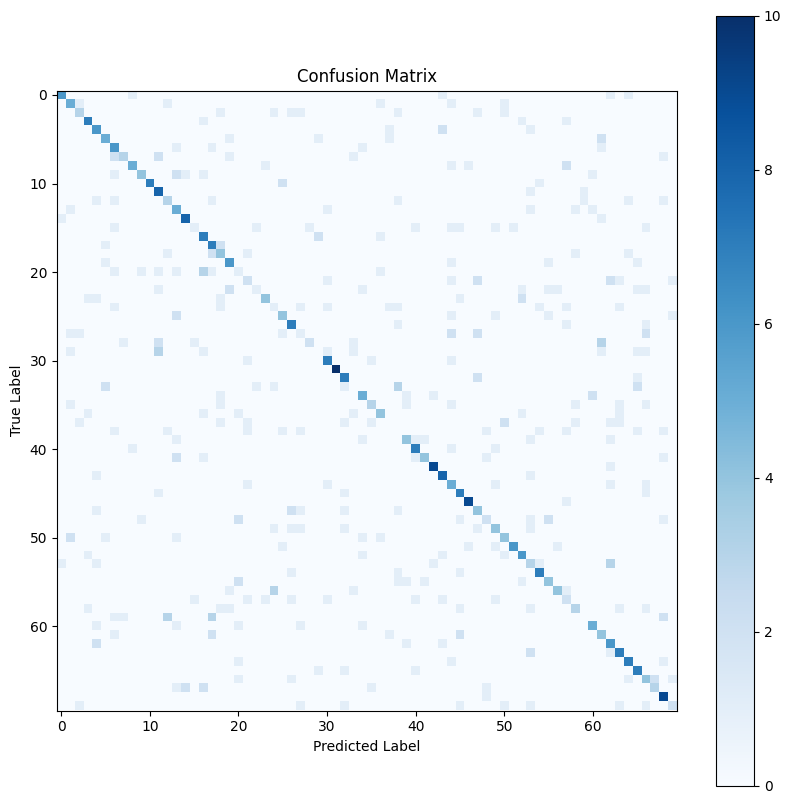